In [14]:
#импортируем необходимые компоненты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as sil_sc
from sklearn.decomposition import PCA

In [32]:
predata = pd.read_csv("data.csv").iloc[:,1:] 
#выбираем все строки, все столбцы, начиная с первого, т.к. столбец "id" нам не нужен

In [36]:
data=PCA(n_components=0.9).fit_transform(predata)
#Находим координаты векторов, задающих пространство меньшей размерности и применяем
#уменьшение размерности для data
#Применяем метод PCA для уменьшения размерности так, чтобы 90% дисперсии было сохранено.

In [54]:
print(data.shape)

(98000, 13)


In [37]:
#Находим оптимальное количество кластеров с помощью "Elbow method" и с помощью "average silhouette method"
distortions=[]
av_sil=[]
for i in range(2,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data)#находим координаты центроидов для данного количесвта кластеров
    print("we have just fitted it for i=",i)
    distortions.append(kmeans.inertia_)
    av_sil.append(sil_sc(data,kmeans.predict(data),metric="euclidean"))
    print("we have just added sil_sc for i=",i)
    #добавляем сумму сум квадратов расстояний от объекта до ближайшего к нему центроида 
    #в качестве значения SSW для данного кол-ва кластеров

we have just fitted it for i= 2
we have just added sil_sc for i= 2
we have just fitted it for i= 3
we have just added sil_sc for i= 3
we have just fitted it for i= 4
we have just added sil_sc for i= 4
we have just fitted it for i= 5
we have just added sil_sc for i= 5
we have just fitted it for i= 6
we have just added sil_sc for i= 6
we have just fitted it for i= 7
we have just added sil_sc for i= 7
we have just fitted it for i= 8
we have just added sil_sc for i= 8
we have just fitted it for i= 9
we have just added sil_sc for i= 9


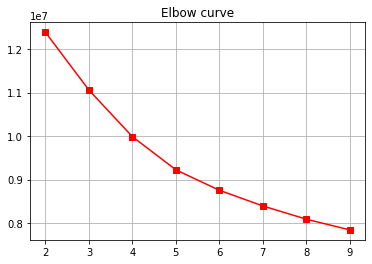

In [38]:
plt.title("Elbow curve")
plt.plot(range(2,10),distortions,color="red",marker="s")
plt.grid("True")
plt.show()
# По графику видно, что SSW начинает падать медленнее , начиная с 5 кластеров. Пока примем это за оптимальный вариант

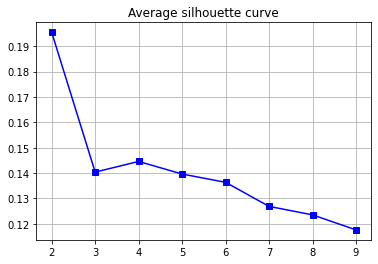

In [39]:
plt.title("Average silhouette curve")
plt.plot(range(2,10),av_sil,color="blue",marker="s")
plt.grid("True")
plt.show()
#По графику видно, что максимальный средний силуэт достигается при K=2 кластерах

In [51]:
# Пробуем найти такую инициализацию центроидов, при которой в итоге получилось бы минимальная inertia(SSW)
best = KMeans(n_clusters=5,init='random').fit(data)
for i in range(1,20):
    kmeans_5=KMeans(n_clusters=3,init='random').fit(data)
    print("we have just computed {0}th fitted estimator".format(i))
    if kmeans_5.inertia_<best.inertia_:
        best=kmeans_5
sub=best.predict(data)

we just computed 1th fitted estimator
we just computed 2th fitted estimator
we just computed 3th fitted estimator
we just computed 4th fitted estimator
we just computed 5th fitted estimator
we just computed 6th fitted estimator
we just computed 7th fitted estimator
we just computed 8th fitted estimator
we just computed 9th fitted estimator
we just computed 10th fitted estimator
we just computed 11th fitted estimator
we just computed 12th fitted estimator
we just computed 13th fitted estimator
we just computed 14th fitted estimator
we just computed 15th fitted estimator
we just computed 16th fitted estimator
we just computed 17th fitted estimator
we just computed 18th fitted estimator
we just computed 19th fitted estimator


In [52]:
submition=pd.DataFrame({"Id":pd.read_csv("data.csv")["id"].values,"Predicted":sub})

In [53]:
submition.to_csv("submition.csv",index=False)